In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 
from astropy.table import Table

from snewpy.neutrino import Flavor, MassHierarchy, MixingParameters
from snewpy.models import Nakazato_2013
from snewpy.models.ccsn import Fornax_2022
from snewpy.models.ccsn import Bollig_2016
from snewpy.models.ccsn import Sukhbold_2015
from snewpy.flavor_transformation import AdiabaticMSW, NonAdiabaticMSWH, \
                                         TwoFlavorDecoherence, ThreeFlavorDecoherence, \
                                         NeutrinoDecay, AdiabaticMSWes, NonAdiabaticMSWes
from asteria import set_rcparams
from asteria.simulation import Simulation


set_rcparams()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
%matplotlib inline

C:\Users\sanya\AppData\Local\Temp\ipykernel_10252\1695314209.py:11: FutureWarning: snewpy.models.Nakazato_2013 is moved to snewpy.models.ccsn.Nakazato_2013
  from snewpy.models import Nakazato_2013


Get Parameters

In [3]:
nak_params_z2 = list(params for params in Nakazato_2013.get_param_combinations() if params['metallicity'] == 0.02)
nak_params_z4 = list(params for params in Nakazato_2013.get_param_combinations() if params['metallicity'] == 0.004)

In [5]:
sukh_params = list(params for params in Sukhbold_2015.get_param_combinations())

In [7]:
mass = []
for i,m in enumerate(Fornax_2022.param['progenitor_mass'][::25]):
    mass.append(m)

forn_params = list(params for params in Fornax_2022.get_param_combinations() if params['progenitor_mass'] in mass)

Get Models

In [6]:
sukh_models=[]
for param in sukh_params:
    sukh_models.append(Sukhbold_2015(**param))

In [4]:
nak_models_z2=[]
nak_models_z4=[]
for param in nak_params_z2:
    nak_models_z2.append(Nakazato_2013(**param))
    
for param in nak_params_z4:
    nak_models_z4.append(Nakazato_2013(**param))

In [33]:
forn_models=[]
for param in forn_params:
    forn_models.append(Fornax_2022(**param))

Text(0.5, 0.98, 'Mean Energies and Alphas for Nakazato with z=.02')

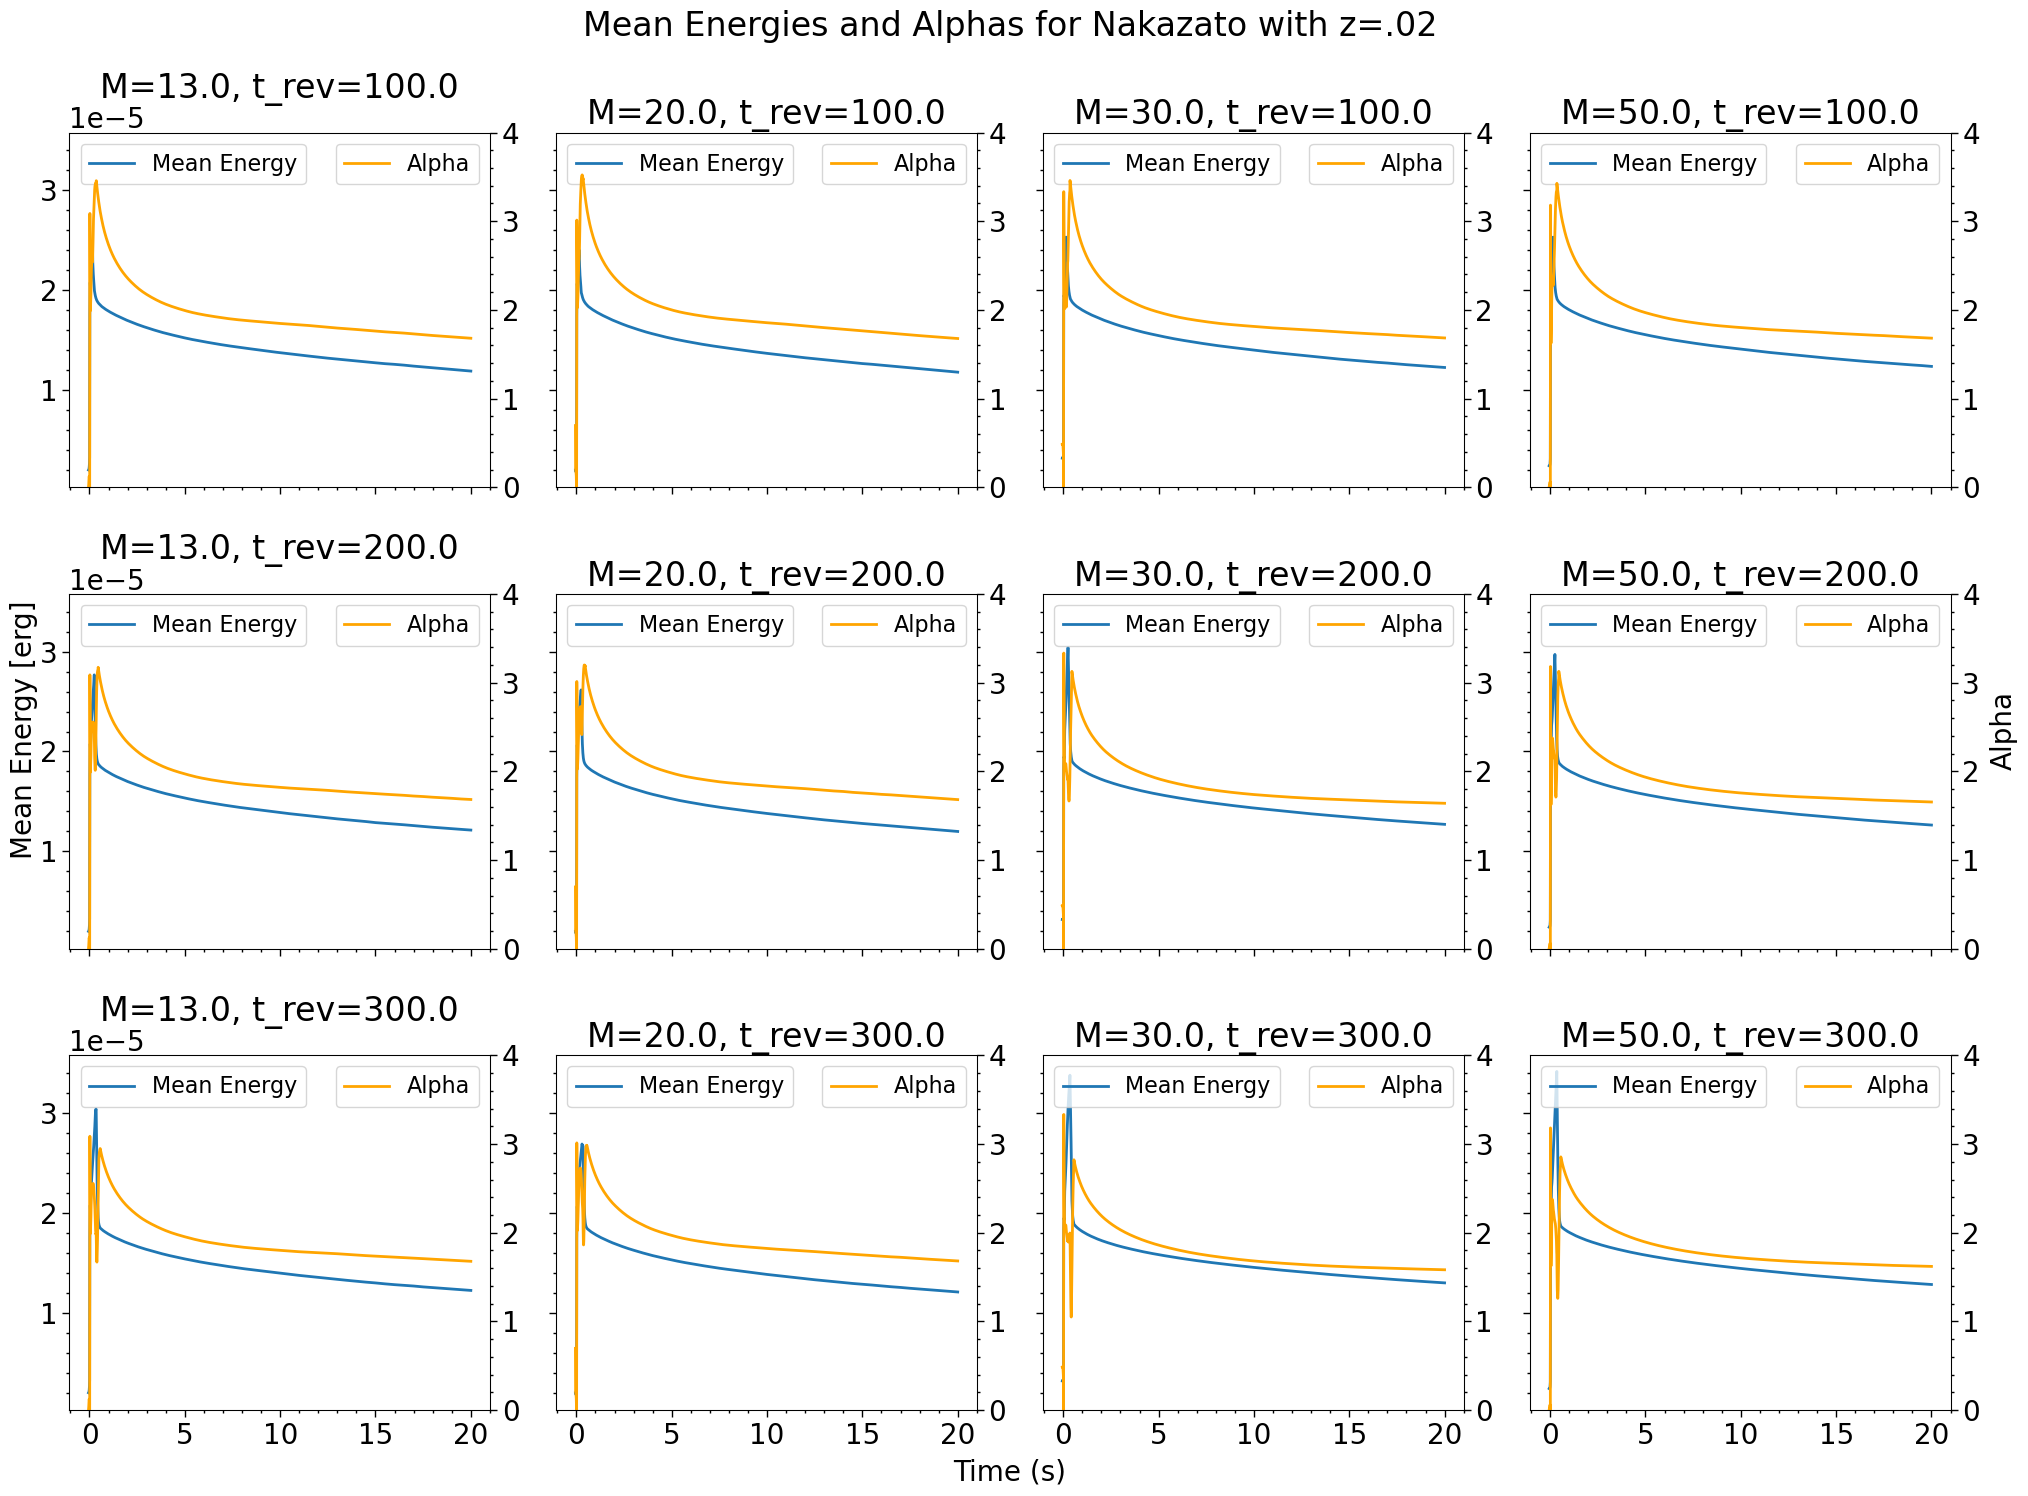

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        
        mod = nak_models_z2[counts]

        ax.plot(mod.time, mod.meanE[Flavor(2)].to('erg').value, label='Mean Energy')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z2[counts]['progenitor_mass'].value,
                                             nak_params_z2[counts]['revival_time'].value))
        ax.legend(loc='upper left')
        
        ax_alpha = ax.twinx()
        ax_alpha.plot(mod.time, mod.pinch[Flavor(2)], label='Alpha', color='orange')
        ax_alpha.legend(loc='upper right')
        ax_alpha.set_ylim(0, 4)
        
        ax.grid(False)
        ax_alpha.grid(False)
        
        counts+=1

        
fig.text(0.5, 0., 'Time (s)', ha='center')
fig.text(0., 0.5, 'Mean Energy [erg]', va='center', rotation='vertical')
fig.text(.99,.5, 'Alpha', va='center', rotation='vertical')
fig.suptitle('Mean Energies and Alphas for Nakazato with z=.02')

Text(0.5, 0.98, 'Mean Energies and Alphas for Nakazato with z=.004')

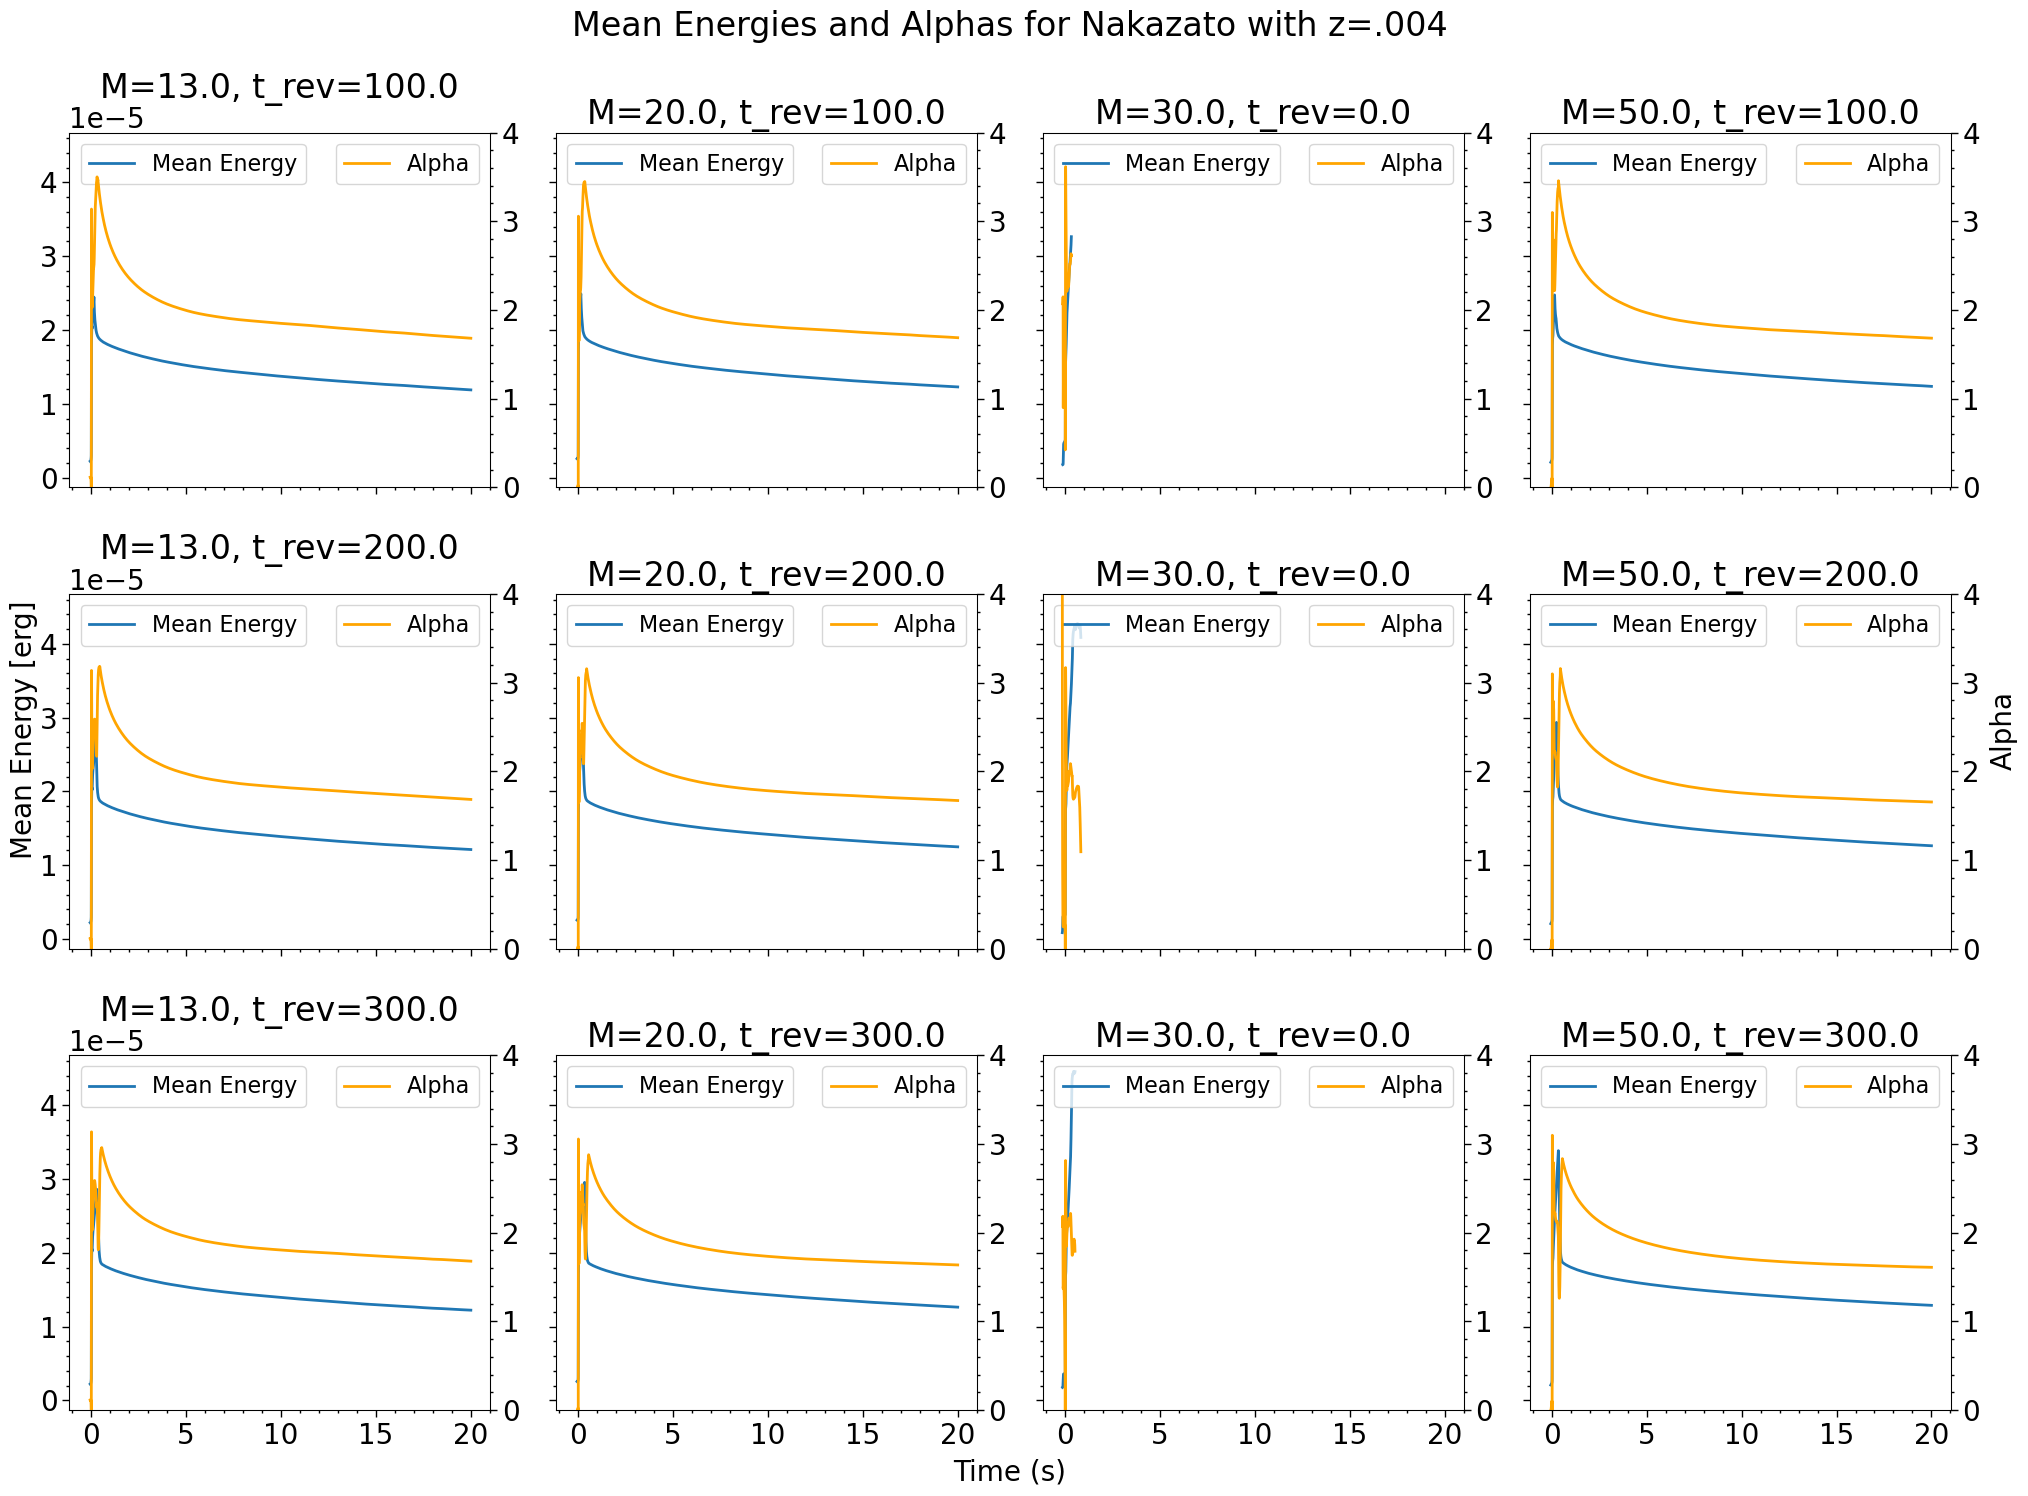

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        
        mod = nak_models_z4[counts]

        ax.plot(mod.time, mod.meanE[Flavor(2)].to('erg').value, label='Mean Energy')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                             nak_params_z4[counts]['revival_time'].value))
        ax.legend(loc='upper left')
        
        ax_alpha = ax.twinx()
        ax_alpha.plot(mod.time, mod.pinch[Flavor(2)], label='Alpha', color='orange')
        ax_alpha.legend(loc='upper right')
        ax_alpha.set_ylim(0, 4)
        
        ax.grid(False)
        ax_alpha.grid(False)
        
        counts+=1

        
fig.text(0.5, 0., 'Time (s)', ha='center')
fig.text(0., 0.5, 'Mean Energy [erg]', va='center', rotation='vertical')
fig.text(.99,.5, 'Alpha', va='center', rotation='vertical')
fig.suptitle('Mean Energies and Alphas for Nakazato with z=.004')

Text(0.5, 0.98, 'Mean Energies and Alphas for Sukhbold 2015')

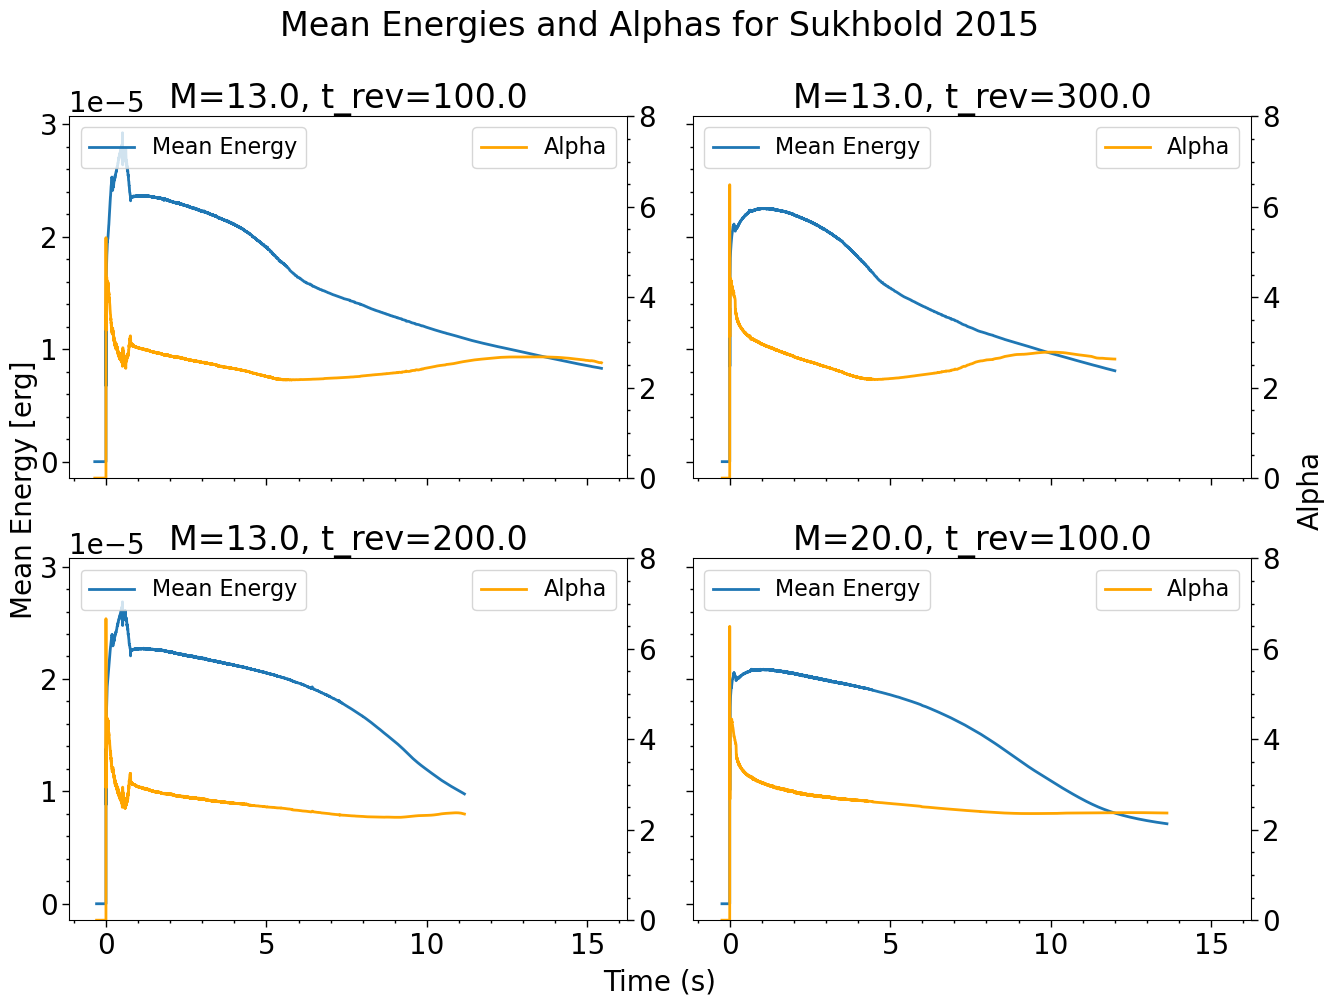

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(2,2, figsize=(13,10), sharex=True, sharey=True,tight_layout=True)


counts=0
for i in range(2):
    for j in range(2):
        ax=axes[j,i]
        mod=sukh_models[counts]
        
        ax.plot(mod.time, mod.meanE[Flavor(2)].to('erg').value, label='Mean Energy')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                             nak_params_z4[counts]['revival_time'].value))
        ax.legend(loc='upper left')
        
        ax_alpha = ax.twinx()
        ax_alpha.plot(mod.time, mod.pinch[Flavor(2)], label='Alpha', color='orange')
        ax_alpha.legend(loc='upper right')
        ax_alpha.set_ylim(0, 8)
        
        ax.grid(False)
        ax_alpha.grid(False)
        
        counts+=1

        
fig.text(0.5, 0., 'Time (s)', ha='center')
fig.text(0., 0.5, 'Mean Energy [erg]', va='center', rotation='vertical')
fig.text(.99,.5, 'Alpha', va='center', rotation='vertical')
fig.suptitle('Mean Energies and Alphas for Sukhbold 2015')



AttributeError: 'Fornax_2022' object has no attribute 'meanE'

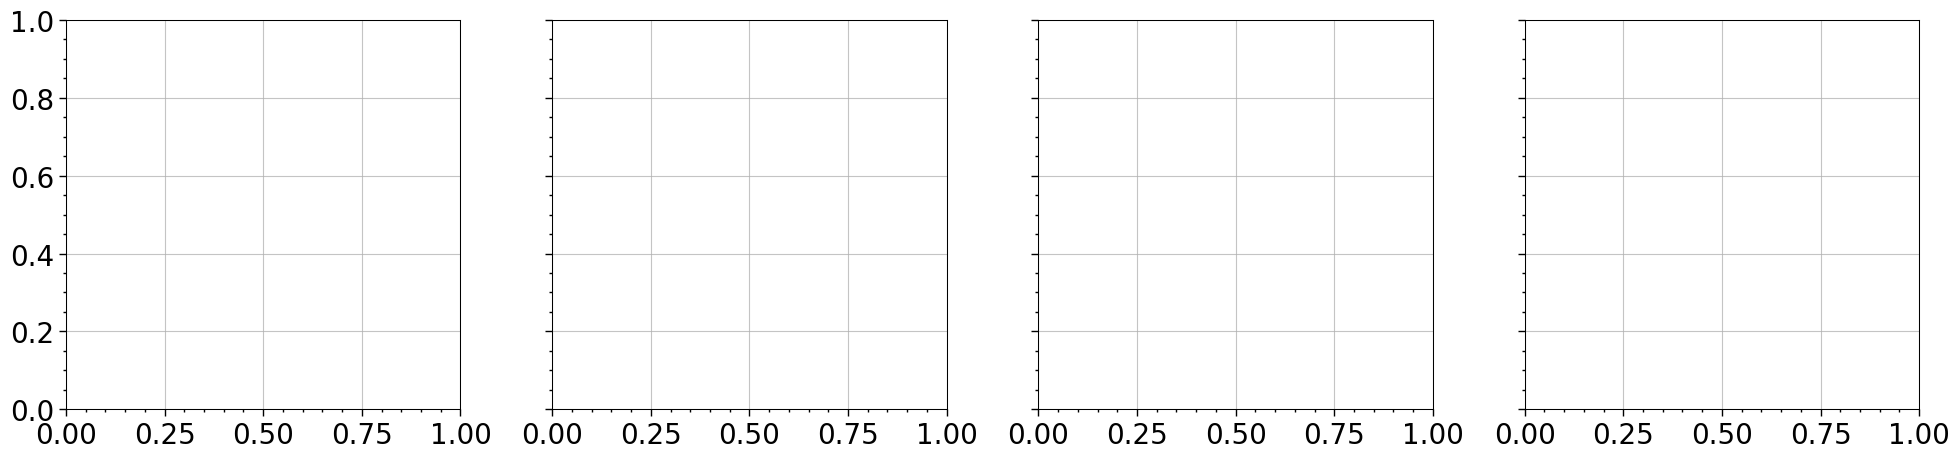

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(1,4, figsize=(20,5), sharex=True, sharey=True,tight_layout=True)

for i in range(4):
    ax=axes[i]
    mod=forn_models[i]
    ax.plot(mod.time, mod.meanE[Flavor(2)].to('erg').value, label='Mean Energy')
    ax.set_title('M={}, t_rev={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                             nak_params_z4[counts]['revival_time'].value))
    ax.legend(loc='upper left')
        
    ax_alpha = ax.twinx()
    ax_alpha.plot(mod.time, mod.pinch[Flavor(2)], label='Alpha', color='orange')
    ax_alpha.legend(loc='upper right')
    ax_alpha.set_ylim(0, 8)
        
    ax.grid(False)
    ax_alpha.grid(False)
        
    counts+=1

        
fig.text(0.5, 0., 'Time (s)', ha='center')
fig.text(0., 0.5, 'Mean Energy [erg]', va='center', rotation='vertical')
fig.text(.99,.5, 'Alpha', va='center', rotation='vertical')
fig.suptitle('Mean Energies and Alphas for Fornax 2022')


        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Fornax 2022, Unmixed')